In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
import math
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Need to reshape to have a single channel to use as input for our model
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

# There are 10 classes each represented by an integer from 0 to 9. We transform the integer into a 10-row binary vector using the to_categorical utility function 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

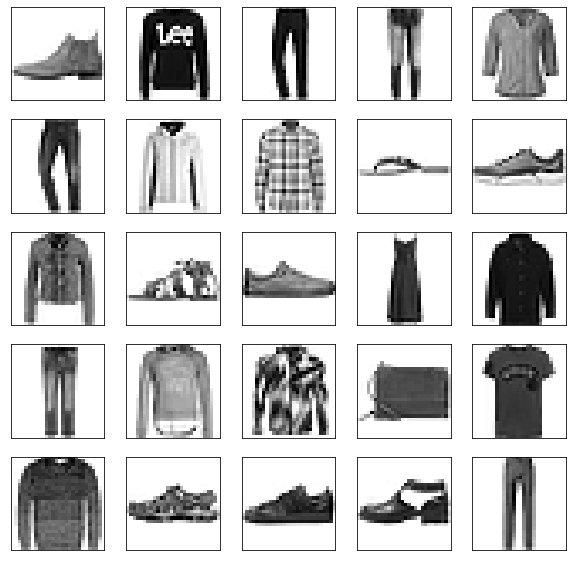

In [49]:
# Normalize
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255
# Plot some image examples
plt.figure(figsize=(10,10))
i = 0
for image in x_test[:25]:
  image = image.reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  i += 1
plt.show()

In [50]:
# Model
model = tf.keras.Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),  padding='same', activation='relu',  input_shape=(28, 28, 1)))                
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5059 - accuracy: 0.8201
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2606 - accuracy: 0.9062
Epoch 3/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2116 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1830 - accuracy: 0.9328
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1555 - accuracy: 0.9418


In [55]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2663854956626892
Test accuracy: 0.9070000052452087


Usefull Links:
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist